## Decision Tree Implementation 
Using Decision Tree Classifier

In [ ]:
import pandas as pd
df = pd.read_csv("drug200.csv") # dataset taken from kaggle link : https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


The **`Na_to_K`** in the dataset refers to the Sodium-to-Potassium ratio in the patient's blood. This feature is a continuous variable representing the ratio of sodium (Na) and potassium (K) concentrations in the blood. It is one of the features in the dataset, along with Age, Sex, Blood Pressure, and Cholesterol, used to predict the drug that worked for each patient

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
inputs = df.drop(['Drug'], axis='columns')
target = df.Drug
target.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [ ]:
inputs.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

''' 
LabelEncoder is designed to work with a single target variable 
(i.e., a single column), not with multiple columns
'''

# Encode each column individually
for col in ['Sex', 'BP', 'Cholesterol']:
    inputs[col] = le.fit_transform(inputs[col])

inputs

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [ ]:
# Converting Drug which is our target column to numerical values through label encoding.

target = le.fit_transform(target)
target

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.975

In [ ]:
model.predict([[30,0,1,1,23]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([4])

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1,  0,  0,  0,  0],
       [ 1,  4,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  9,  0],
       [ 0,  0,  0,  0, 22]])

Text(58.222222222222214, 0.5, 'Truth')

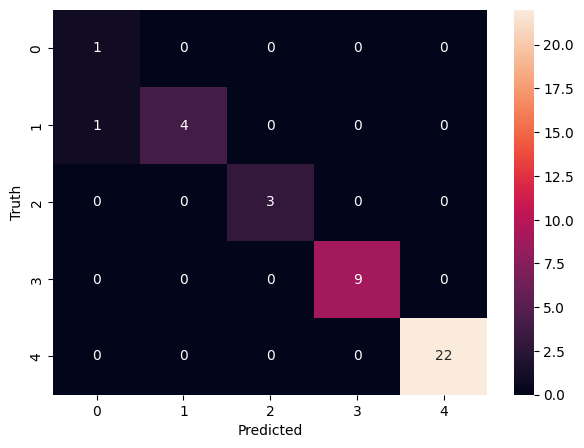

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')